In [2]:
# dg casting void

Next, change directory to wherever you created your folder. 

In [1]:
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/cast03'

os.chdir(WORKING_DIRECTORY)
!pwd

/home/studio-lab-user/ml635e/cast03


In [2]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls -la

total 16
drwxrwxr-x  7 studio-lab-user users   70 Jun  9 10:36 .
drwxr-xr-x 10 studio-lab-user users  293 Jun  9 14:41 ..
drwxrwxr-x  2 studio-lab-user users  167 Jun  9 10:36 excl
drwxrwxr-x  2 studio-lab-user users 4096 Jun  9 10:37 images
drwxrwxr-x  2 studio-lab-user users 4096 Jun  9 10:36 train
drwxrwxr-x  2 studio-lab-user users 4096 Jun  9 10:36 unused
drwxrwxr-x  2 studio-lab-user users 4096 Jun  9 10:36 val


Now, let's install the Detecto package using pip. 

In [5]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

  Using cached torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl (750.6 MB)
  Using cached torchvision-0.12.0-cp39-cp39-manylinux1_x86_64.whl (21.0 MB)


Import everything we need in the following code block:

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

In [4]:
%%bash
find ./images -type f | tail -n1

./images/cast_ok_0_775.jpeg


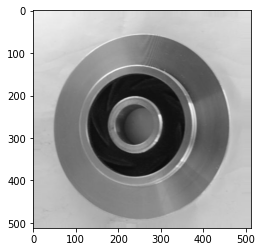

In [5]:
image = utils.read_image('./images/cast_ok_0_775.jpeg')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [6]:
# Do this twice: once for our trning labels and once for our validation labels
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('val', 'val.csv')

filename  width  height class  xmin  ymin  xmax  ymax  \
0   cast_def_0_1015.jpeg    512     512  Void   202   387   224   402   
1   cast_def_0_1077.jpeg    512     512  Void   262   417   285   442   
2   cast_def_0_1112.jpeg    512     512  Void   279   482   307   497   
3   cast_def_0_1115.jpeg    512     512  Void   155   134   171   154   
4   cast_def_0_1137.jpeg    512     512  Void   185    88   197   100   
5   cast_def_0_1155.jpeg    512     512  Void    55   124    93   152   
6   cast_def_0_1283.jpeg    512     512  Void   165   406   197   447   
7   cast_def_0_1381.jpeg    512     512  Void   276   460   313   493   
8   cast_def_0_1443.jpeg    512     512  Void   132   312   152   333   
9   cast_def_0_1443.jpeg    512     512  Void   235   408   244   414   
10  cast_def_0_1446.jpeg    512     512  Void   262   397   299   419   
11  cast_def_0_1547.jpeg    512     512  Void   158   110   185   130   
12  cast_def_0_1616.jpeg    512     512  Void   222    80   244    97   
13  cast_def_0_1616.jpeg    512     512  Void   358   121   371   138   
14  cast_def_0_1658.jpeg    512     512  Void   337   411   380   444   
15    cast_def_0_42.jpeg    512     512  Void   270    97   297   121   

    image_id  
0          0  
1          1  
2          2  
3          3  
4          4  
5          5  
6          6  
7          7  
8          8  
9          8  
10         9  
11        10  
12        11  
13        11  
14        12  
15        13

Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

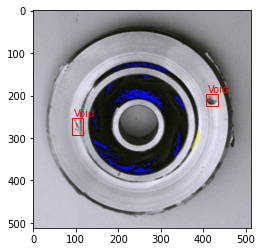

In [7]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [8]:
!date -d "-4 hours"

Thu Jun  9 10:42:39 UTC 2022


Thu Jun  9 10:42:49 UTC 2022
It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:14<00:00, 19.41s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:43<00:00,  3.08s/it]


Loss: 0.2597553615591356
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:13<00:00, 19.32s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:43<00:00,  3.10s/it]


Loss: 0.35718037081616266
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [03:15<00:00, 19.58s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:42<00:00,  3.05s/it]


Loss: 0.2844363365854536
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [02:33<00:00, 15.38s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:29<00:00,  2.14s/it]


Loss: 0.28915747574397493
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [02:07<00:00, 12.70s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:27<00:00,  1.94s/it]


Loss: 0.27420672348567415
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [02:00<00:00, 12.08s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


Loss: 0.2763060395206724
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:53<00:00, 11.38s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


Loss: 0.2764374688267708
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:53<00:00, 11.33s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.68s/it]


Loss: 0.2778940440288612
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:56<00:00, 11.61s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.64s/it]


Loss: 0.2794446370431355
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [01:52<00:00, 11.26s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:23<00:00,  1.67s/it]

Loss: 0.2796432077884674


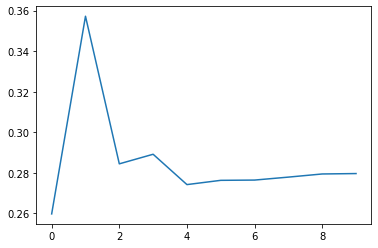

Thu Jun  9 11:11:54 UTC 2022


In [9]:
# Create our validation dataset
!date -d "-4 hours"
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Void'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()
!date -d "-4 hours"


Let's see how well our model does on a couple images from our validation set:

tensor([[[0.9474, 0.9474, 0.9303,  ..., 1.0673, 1.0673, 1.0673],
         [0.9132, 0.9132, 0.9132,  ..., 1.1015, 1.1015, 1.1015],
         [0.8618, 0.8618, 0.8618,  ..., 1.0331, 1.0331, 1.0331],
         ...,
         [0.3994, 0.3994, 0.3823,  ..., 0.4679, 0.4679, 0.4679],
         [0.3994, 0.3994, 0.3994,  ..., 0.5193, 0.5193, 0.5193],
         [0.3823, 0.3823, 0.3823,  ..., 0.6734, 0.6734, 0.6734]],

        [[1.0980, 1.0980, 1.0805,  ..., 1.2206, 1.2206, 1.2206],
         [1.0630, 1.0630, 1.0630,  ..., 1.2556, 1.2556, 1.2556],
         [1.0105, 1.0105, 1.0105,  ..., 1.1856, 1.1856, 1.1856],
         ...,
         [0.5378, 0.5378, 0.5203,  ..., 0.6078, 0.6078, 0.6078],
         [0.5378, 0.5378, 0.5378,  ..., 0.6604, 0.6604, 0.6604],
         [0.5203, 0.5203, 0.5203,  ..., 0.8179, 0.8179, 0.8179]],

        [[1.3154, 1.3154, 1.2980,  ..., 1.4374, 1.4374, 1.4374],
         [1.2805, 1.2805, 1.2805,  ..., 1.4722, 1.4722, 1.4722],
         [1.2282, 1.2282, 1.2282,  ..., 1.4025, 1.4025, 1.

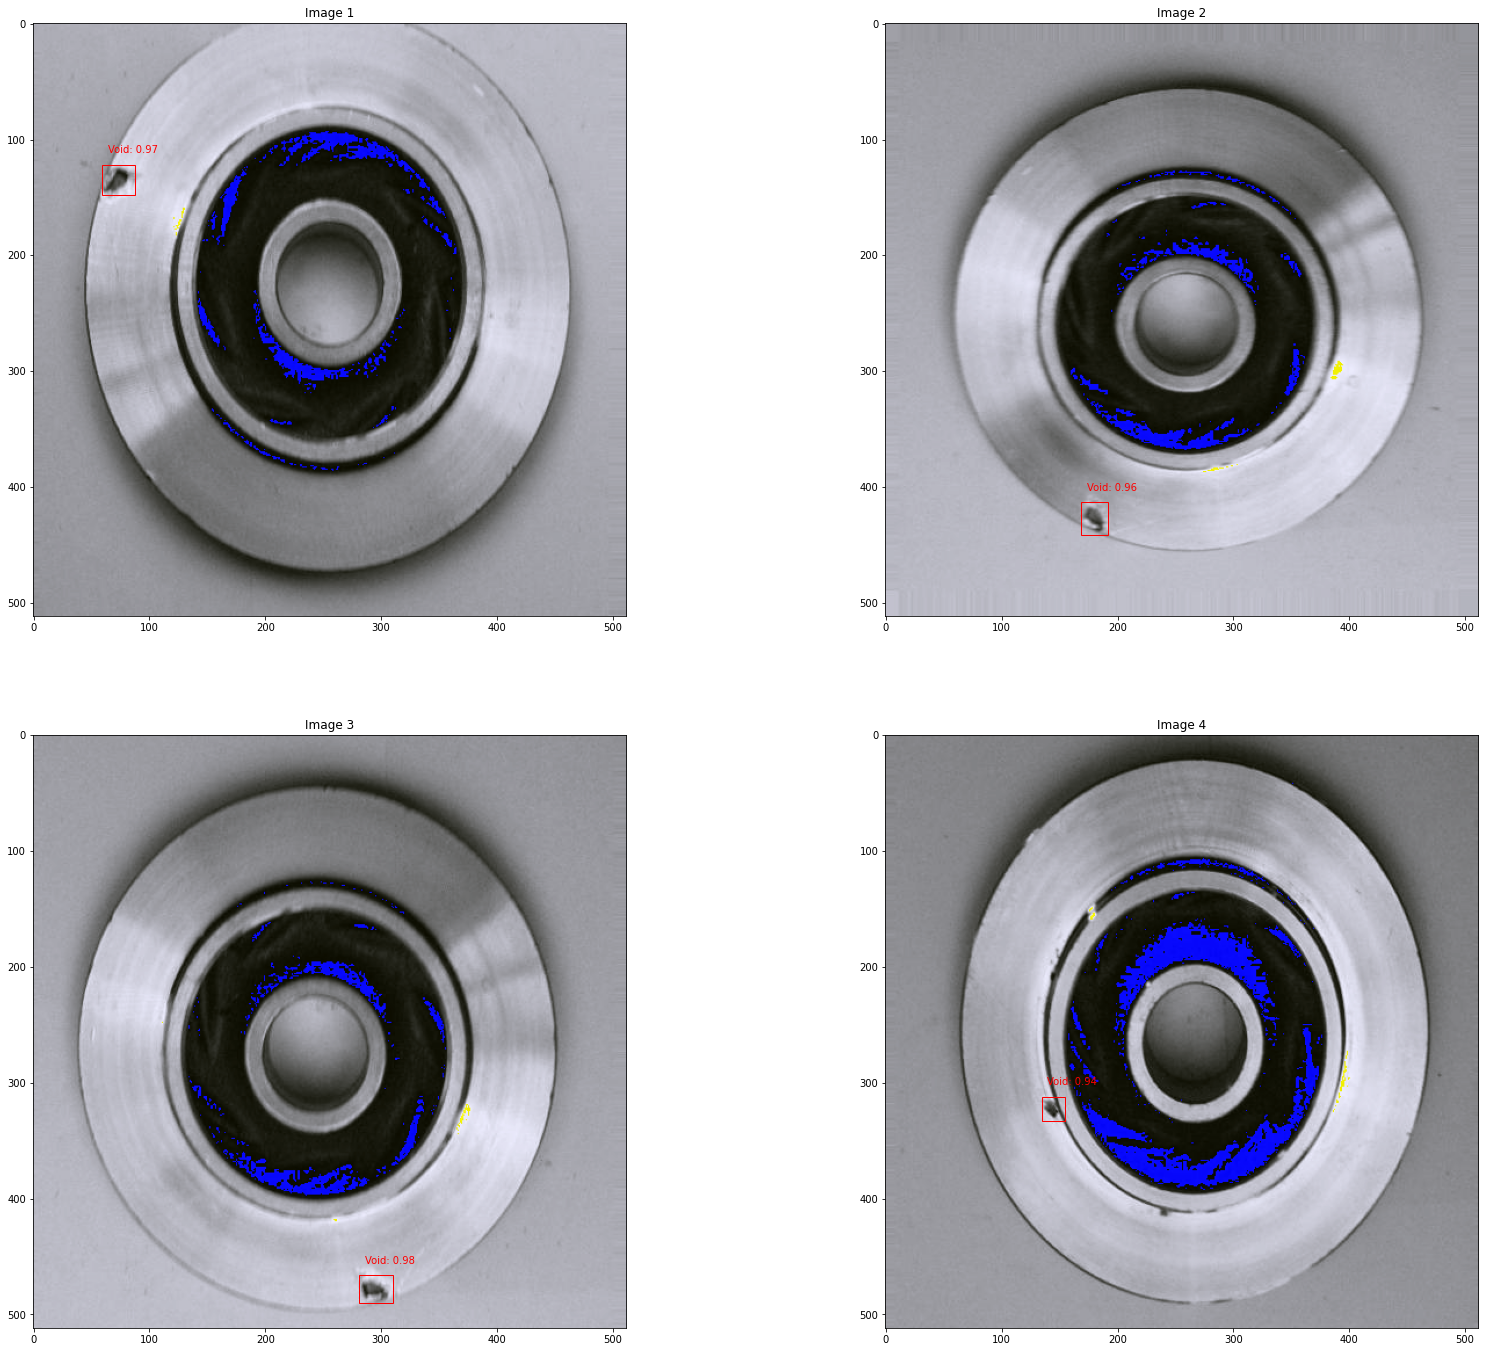

In [12]:
images = []
# Create a list of images  from val_dataset
for i in range(5, 9, 1):
    image, _ = val_dataset[i]
    images.append(image)
    print(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(2, 2), figsize=(28, 24))

In [37]:
!find ./testfinal -type f | tail -n -3
!pwd

./testfinal/cast_def_0_9687.jpeg
./testfinal/cast_def_0_4526.jpeg
./testfinal/cast_ok_0_645.jpeg
/home/studio-lab-user/ml635e/cast03


In [47]:
f1=os.listdir("./testfinal")
print(f1)
import pathlib
for filepath in pathlib.Path("testfinal/").glob('**/*'):
    print(filepath.absolute())

['cast_def_0_9591.jpeg', 'cast_def_0_9687.jpeg', 'cast_def_0_4526.jpeg', 'cast_ok_0_645.jpeg']
/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_9591.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_9687.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_4526.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_ok_0_645.jpeg


(['Void', 'Void', 'Void', 'Void', 'Void'], tensor([[201.4054,  96.3496, 223.2393, 114.8762],
        [288.3260,  40.3028, 312.3464,  49.1691],
        [291.8884,  36.1557, 307.8845,  50.4667],
        [373.7591,  77.6319, 386.9438,  90.1851],
        [191.1322,  97.5514, 226.9661, 118.0300]]), tensor([0.9915, 0.5907, 0.1901, 0.1260, 0.0728]))
[(['Void'], tensor([[201.4054,  96.3496, 223.2393, 114.8762]]), tensor([0.9915]))]


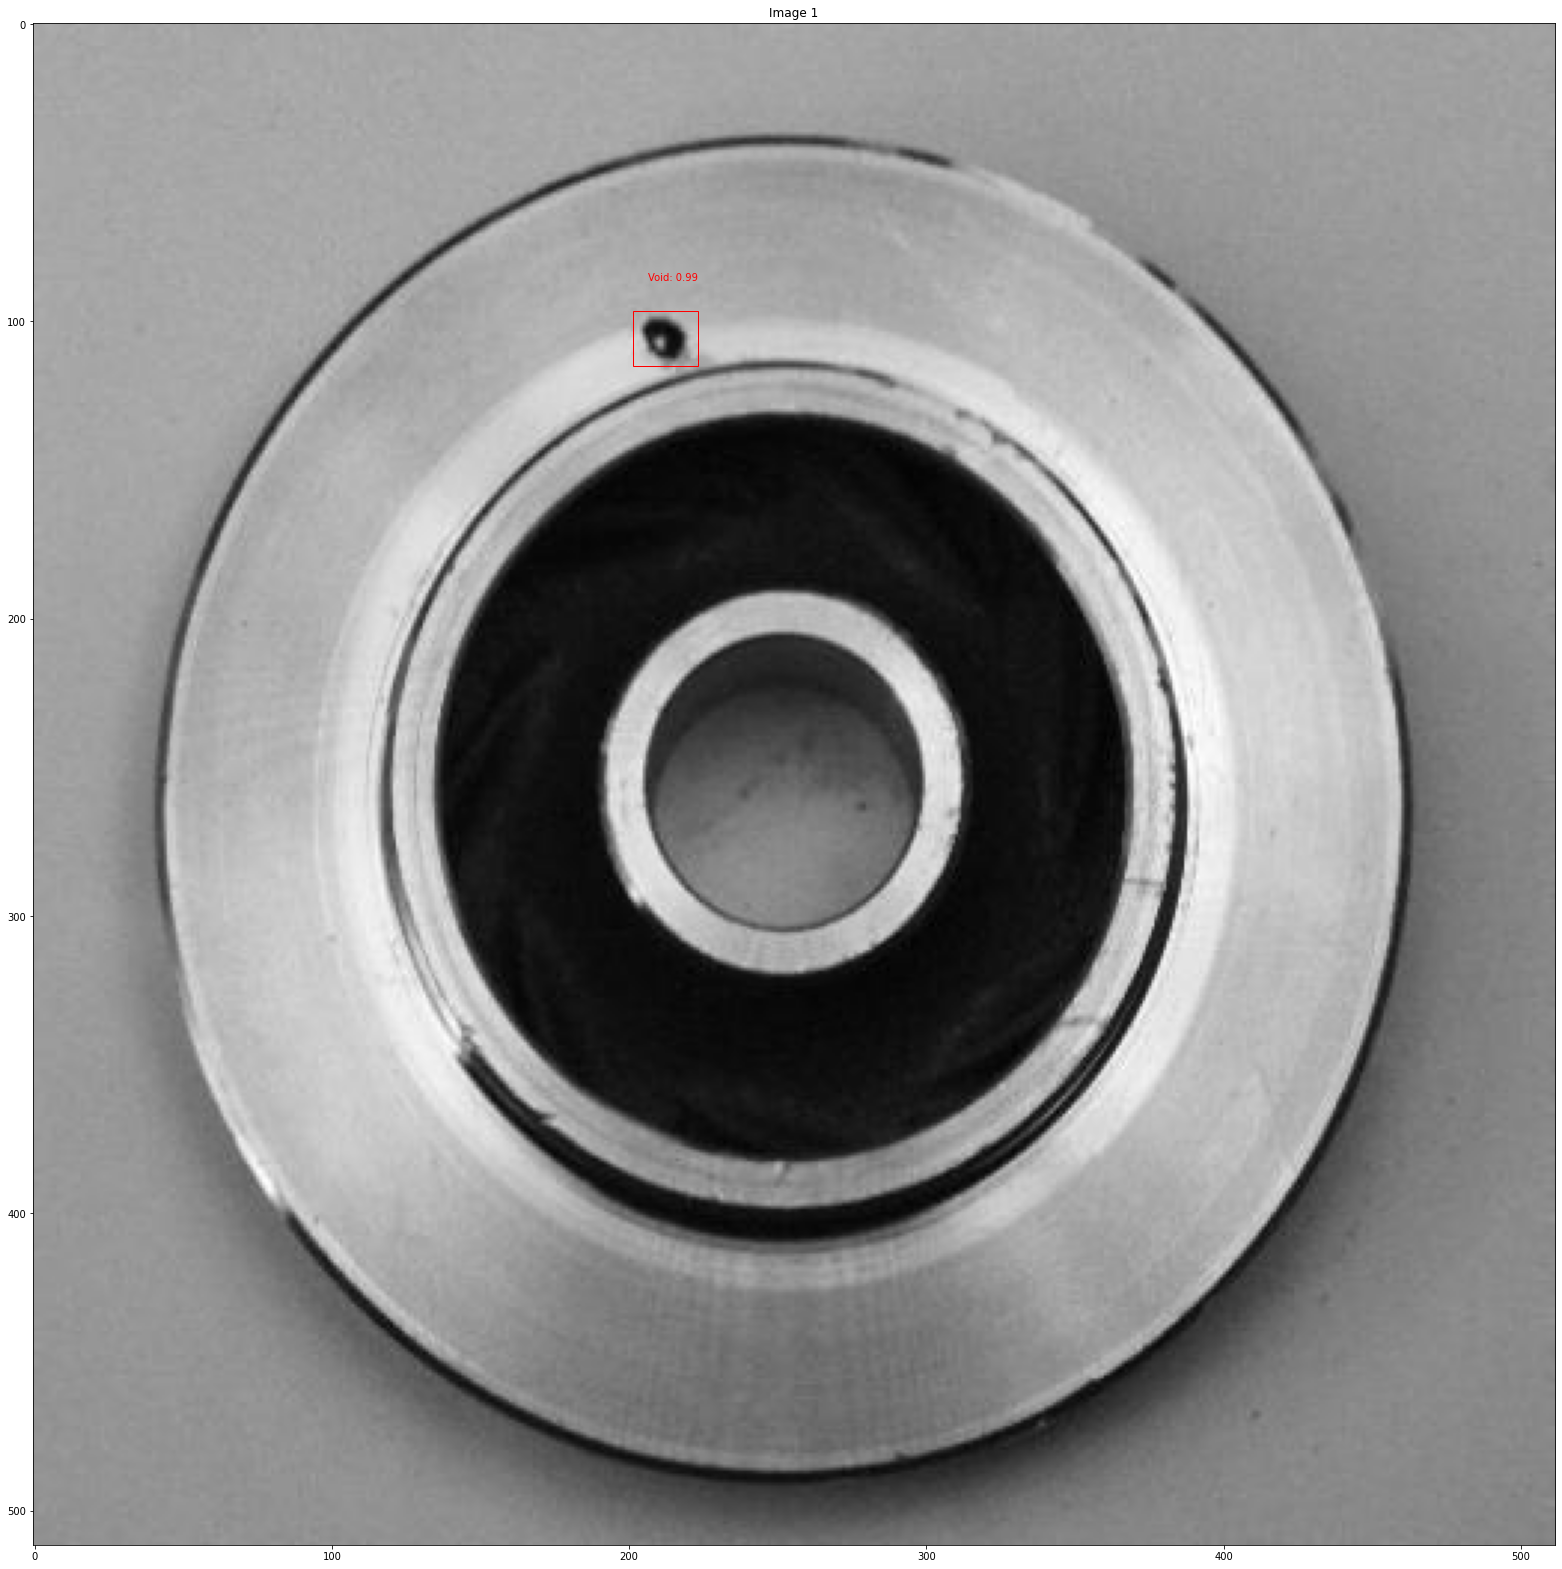

In [39]:
# one image prediction.

image = utils.read_image('./testfinal/cast_def_0_9591.jpeg')
predictions = model.predict(image)

images = []
# for i in range(4):
#     image, _ = val_dataset[i]
images.append(image)

top_predictions = model.predict_top(images)

print(predictions)
print(top_predictions)
visualize.plot_prediction_grid(model, images, dim=(1, 1), figsize=(28, 28))


In [ ]:
# error -  IndexError: index 0 is out of bounds for axis 0 with size 0

!pwd
testfinal_data = core.Dataset( 'testfinal/')
print(val_dataset)
print(val_dataset[0])
print(testfinal_data)
print(testfinal_data[1])
images = []
for i in range(0,3,1):
    print(i)
    image, _ = testfinal_data[i]
    images.append(image)
top_predictions = model.predict_top(images)
# print(predictions)
print(top_predictions)    
visualize.plot_prediction_grid(model, images, dim=(4, 1), figsize=(128, 128))

/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_9591.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_9687.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_def_0_4526.jpeg
/home/studio-lab-user/ml635e/cast03/testfinal/cast_ok_0_645.jpeg


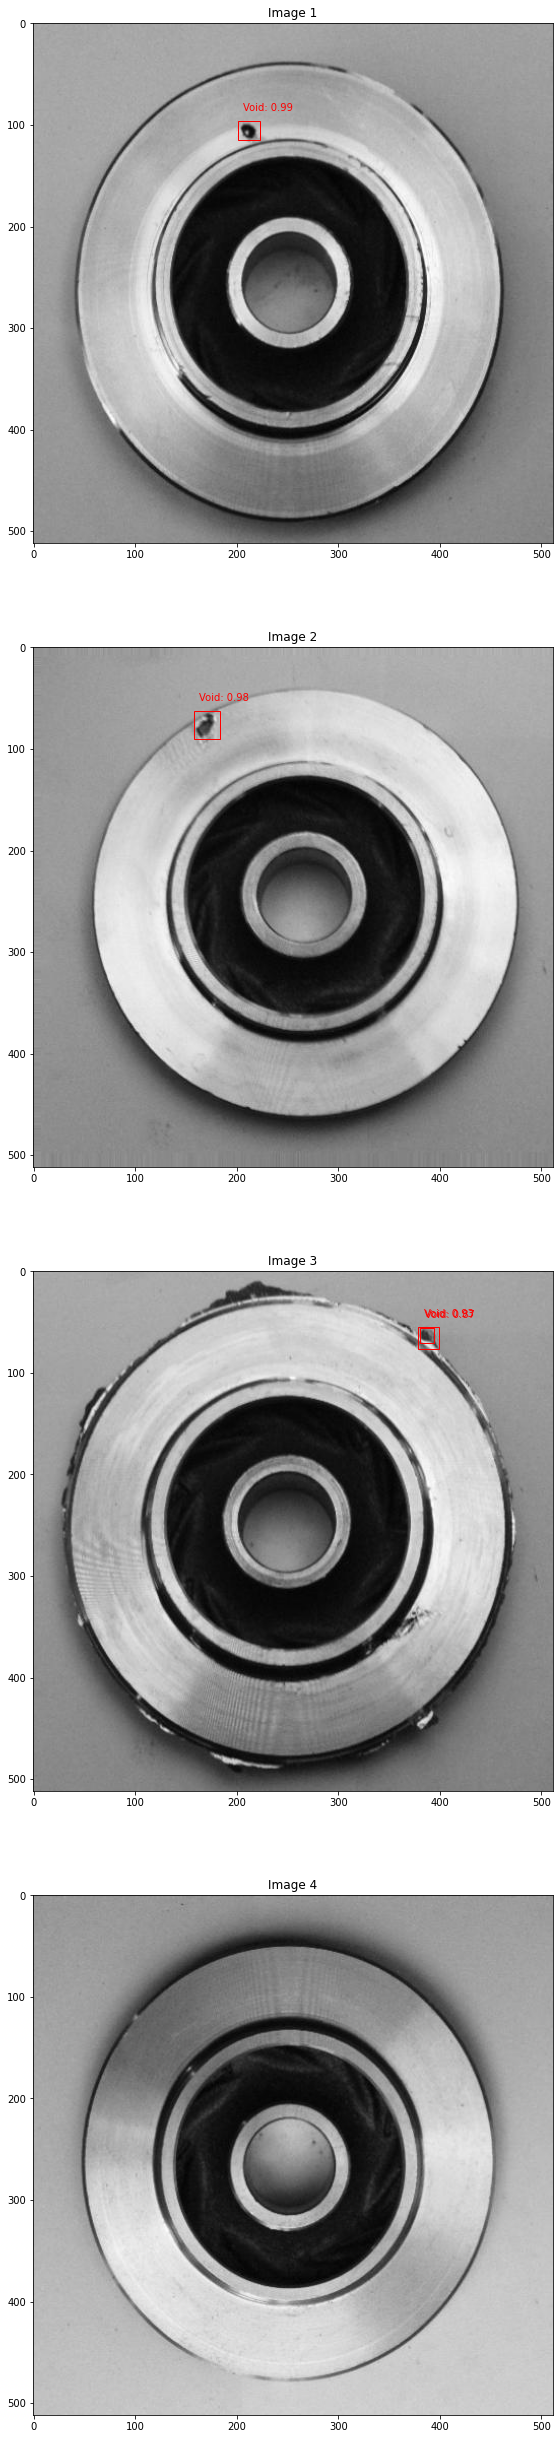

In [59]:
# 203 loop show predictions

images = []
import pathlib
for filepath in pathlib.Path("testfinal/").glob('**/*'):
    print(filepath.absolute())
    path01=str(filepath.absolute())
    image = utils.read_image(path01)
    images.append(image)

# top_predictions = model.predict_top(images)
# print(top_predictions)

visualize.plot_prediction_grid(model, images, dim=(4, 1), figsize=(44, 44))


In [25]:
import datetime
dtnow = datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S")
fout = f"modelweights_{dtnow}.pth"
model.save(fout)
# model.save("modelweight.pth")
!pwd;ls

/home/studio-lab-user/ml635e/cast03
excl	modelweights_2022-06-09_15.26.11.pth  testfinal  train.csv  val
images	modelweights_2022-06-09_16.01.38.pth  train	 unused     val.csv


## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!